# Data Overview

The National Health and Nutrition Examination Survey (NHANES) Food frequency questionnaire (FFQ) 2005-2006 collects information on the frequency of food consumption over a period of 12 months. 
* portion size is not collected with the FFQ, unlike the DHQ, so the FFQ is not intended to derive estimates of absolute intakes of nutrients or foods, merely the frequency at which any amount is consumed
* sample consists of English or Spanish-speaking participants 2+ years of age who completed at least one 24-hour dietary recall interview
* participants are mailed the FFQs which are completed at home; for children less than 6 years or between 6-11 years, and other subjects unable to complete the survey independently, a proxy respondent (such as a parent) provided assistance
* Diet*Calc software was used to produce daily frequencies for multiple foods and food groups
<br/>

`FFQRAW_D` contains responses
<br/>

`VARLK_D` contains mapping of ID to variable description
<br/>

`FOODLK_D` contains mapping of ID to food description

### VARLOOK vs FOODLOOK
The two files map from ID to description; foodlook contains detailed information about the food, varlook contains information related to the variable (such as if it is consumed in winter) and redundant information about the food; together they provide the most complete information about an entry.

```
VARLOOK[1]    = Tomato Juice, Veg Juice
FOODLOOK[130] = Tomato/veg juice/ all

(the above varlook and foodlook codes co-occur in DietCalc entries)

---

VARLOOK[7]    = Soda in Summer
VARLOOK[8]    = Soda, Rest of Year

FOODLOOK[180] = Soft drinks/ reg/ caff
FOODLOOK[181] = Soft drinks/ reg/ decaf
FOODLOOK[182] = Soft drinks/ diet/ decaf
FOODLOOK[183] = Fruit drinks/ reg

(the above varlook and foodlook codes co-occur in DietCalc entries)
```

In [11]:
import pandas as pd

# 1. FFQ RAW
* SEQN : respondent sequence number (an individual)
* WTS_FFQ : sample weights (respondents with fewer than ten missing frequency values have an FFQ sample weight)
> When a sample is weighted in NHANES it is representative of the U.S. civilian noninstitutionalized resident population. A sample weight is assigned to each sample person. It is a measure of the number of people in the population represented by that sample person.
https://wwwn.cdc.gov/nchs/nhanes/tutorials/weighting.aspx
* DRDINT : number of completed dietary recalls
* FFQ_MISS : number of missing frequency values
* FFQ[0-9]* : FFQ question

In [12]:
ffq = pd.read_csv('../nhanes-2005-2006/FFQRAW_D.csv',index_col=0)

In [13]:
ffq.head()

,SEQN,WTS_FFQ,DRDINT,FFQ_MISS,FFQ0001,FFQ0002,FFQ0003,FFQ0004,FFQ0005,FFQ0006,...,FFQ0136A,FFQ0137,FFQ0137A,FFQ0138,FFQ0138A,FFQ0139,FFQ0139A,FFQ0139B,FFQ0139C,FFQ0139D
0,31129.0,36621.377238,2.0,1.0,1.0,5.0,5.0,5.0,6.0,8.0,...,88.0,1.0,88.0,1.0,88.0,2.0,88.0,2.0,3.0,88.0
1,31131.0,21244.126933,2.0,0.0,1.0,2.0,7.0,2.0,2.0,8.0,...,1.0,3.0,1.0,3.0,1.0,3.0,88.0,88.0,88.0,4.0
2,31132.0,50101.783331,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,88.0,1.0,88.0,3.0,1.0,88.0,88.0,88.0
3,31133.0,6008.055060,2.0,1.0,1.0,3.0,4.0,5.0,1.0,2.0,...,1.0,1.0,88.0,5.0,1.0,9.0,1.0,88.0,88.0,88.0
4,31134.0,47302.600058,2.0,0.0,4.0,4.0,2.0,1.0,2.0,3.0,...,5.0,1.0,88.0,3.0,2.0,5.0,88.0,88.0,88.0,88.0


# 2. FFQ DietCalc
* SEQN : respondent ID
* FFQ_VAR : variable ID
* FFQ_FOOD : food ID from DietCalc
* FFQ_FREQ : daily intake frequency for this food

> __Beverages__<br/>
Never = 0
1 time per month or less = 0.03
2-3 times per month = 0.08
1-2 times per week = 0.21
3-4 times per week = 0.5
5-6 times per week = 0.79
1 time per day = 1
2-3 times per day = 2.5
4-5 times per day = 4.5
6 or more times per day = 7
<br/>
<br/>
__Foods__<br/>
Never= 0
1-6 time per year = 0.01
7-11 times per year = 0.028
1 time per month = 0.033
2-3 times per month = 0.08
1 time per week = 0.14
2 times per week = 0.29
3-4 times per week = 0.5
5-6 times per week = 0.79
1 time per day = 1
2 or more times per day = 2
<br/>
<br/>
__Coffee, tea, and additions to coffee and tea__<br/>
None= 0
Less than 1 cup per month = 0.02
1-3 cups per month = 0.07
1 cup per week = 0.14
2-4 cups per week = 0.43
5-6 cups per week = 0.79
1 cup per day = 1
2-3 cups per day = 2.5
4-5 cups per day = 4.5
6 or more cups per day = 7
<br/>
<br/>
__Proportion Questions__<br/>
Almost never or never = 0
About ¼ of the time = 0.25
About ½ of the time = 0.5
About ¾ of the time = 0.75
Almost always or always = 1

* FFQ_CODE : daily intake frequency imputation code (describes how the daily food frequency was computed from actual questionnaire responses)

| code | description |
|:-|:-|
| 0 | Daily food frequency based on actual questionnaire response |
| 1 | Daily food frequency was imputed due to missing code |
| 2 | Daily food frequency was imputed due to scanning error |
| 3 | Daily food frequency was imputed due to coding error |
< blank > | Missing

In [14]:
ffqdc=pd.read_csv('../nhanes-2005-2006/FFQDC_D.csv',index_col=0)

In [15]:
ffqdc.head()

,SEQN,FFQ_VAR,FFQ_FOOD,FFQ_FREQ,FFQ_CODE
0,31129.0,1.0,130.0,0.00,0
1,31129.0,2.0,128.0,0.50,0
2,31129.0,3.0,129.0,0.79,0
3,31129.0,4.0,184.0,2.50,0
4,31129.0,5.0,12.0,0.79,0


# 3. VARLOOK
* FFQ_VAR : variable ID from DietCalc
* VALUE : food description

In [16]:
varlook=pd.read_csv('../nhanes-2005-2006/VARLK_D.csv',index_col=0)

In [17]:
varlook.head()

,FFQ_VAR,VALUE
0,1.0,"Tomato Juice, Veg Juice"
1,2.0,Orange juice or grapefruit juice
2,3.0,Other fruit juice
3,4.0,"Fruit drinks: Hi-C, lemonade"
4,5.0,Milk (as a beverage)


# 4. FOODLOOK
* FFQ_FOOD : food ID from DietCalc

In [18]:
foodlook=pd.read_csv('../nhanes-2005-2006/FOODLK_D.csv',index_col=0)

In [19]:
foodlook.head()

,FFQ_FOOD,VALUE
0,1.0,Milk/ whole in cereal
1,2.0,Milk/ 2% in cereal
2,3.0,Milk/ 1% in cereal
3,4.0,Milk/ nonfat/skim in cereal
4,5.0,Milk/ soy/ in cereal


# (extended) comparing varlook and foodlook

In [24]:
import matplotlib.pyplot as plt

In [25]:
def findInVarlook(key,show=True):
    if show: print('Varlook')
    ids=[]
    for i,e in enumerate(varlook['VALUE']):
        if key in e.lower():
            if show: print(e)
            ids.append(varlook.loc[i]['FFQ_VAR'])
    return ids

def findInFoodlook(key,show=True):
    if show: print('Foodlook')
    ids=[]
    for i,e in enumerate(foodlook['VALUE']):
        if key in e.lower():
            if show: print(e)
            ids.append(foodlook.loc[i]['FFQ_FOOD'])
    return ids

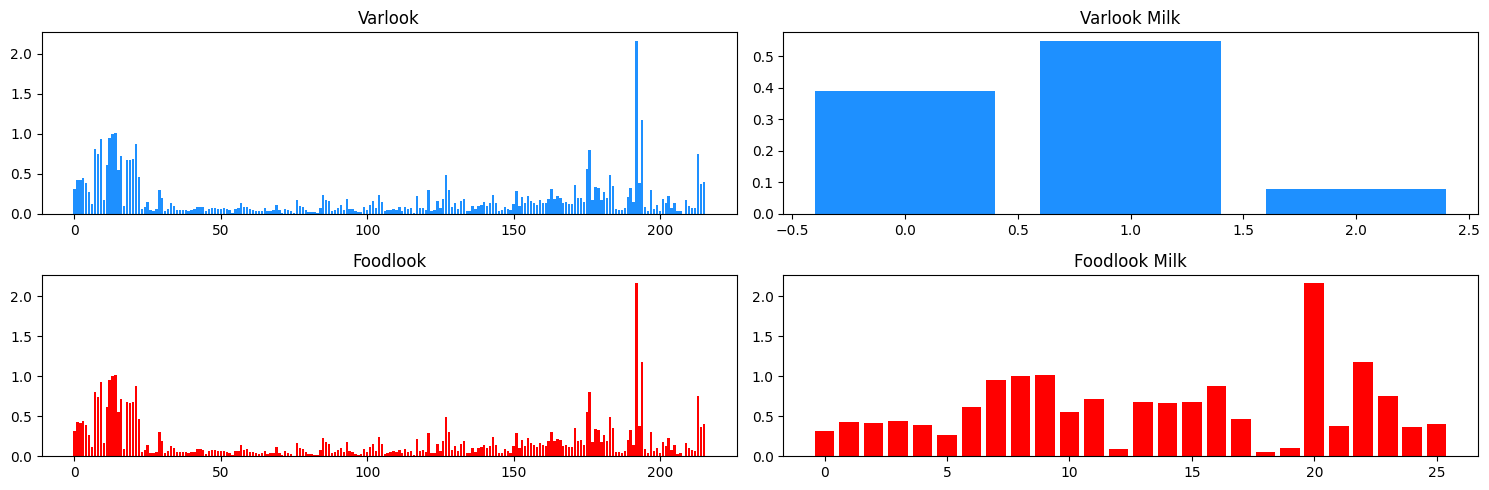

In [28]:
varlookFrequencies=ffqdc.groupby('FFQ_FOOD').mean().drop(columns='SEQN')
varlookMilk = findInVarlook('milk',show=False)
varlookMilkFrequencies = varlookFrequencies.loc[varlookMilk]

foodlookFrequencies=ffqdc.groupby('FFQ_FOOD').mean().drop(columns='SEQN')
foodlookMilk = findInFoodlook('milk',show=False)
foodlookMilkFrequencies = foodlookFrequencies.loc[foodlookMilk]

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,5),tight_layout=True)
ax[0,0].set_title('Varlook')
ax[0,0].bar(list(range(len(varlookFrequencies))),varlookFrequencies['FFQ_FREQ'],color='dodgerblue')
ax[0,1].set_title('Varlook Milk')
ax[0,1].bar(list(range(len(varlookMilkFrequencies))),varlookMilkFrequencies['FFQ_FREQ'],color='dodgerblue');

ax[1,0].set_title('Foodlook')
ax[1,0].bar(list(range(len(foodlookFrequencies))),foodlookFrequencies['FFQ_FREQ'],color='red')
ax[1,1].set_title('Foodlook Milk')
ax[1,1].bar(list(range(len(foodlookMilkFrequencies))),foodlookMilkFrequencies['FFQ_FREQ'],color='red');